# Natural Language Processing

In [4]:
!pip install spacy

In [5]:
!python -m spacy download en_core_web_md
!python -m spacy download en

2022-04-18 16:19:11.339007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-18 16:19:11.339878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')

2022-04-18 16:20:12.769978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-18 16:20:12.770019: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import string # special operations on strings
import spacy # language models
import nltk # natural language toolkit
nltk.download('punkt') # punctuations
from nltk.tokenize import word_tokenize # tokenization
from nltk.corpus import stopwords # stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer #stemming
from sklearn.feature_extraction.text import CountVectorizer  #Count Vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer  # Tf-idf
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
book=pd.read_csv("D:/ExcelR/Data Science(Andheri-Sadanand-Chirag)(21st Aug 2021)/Data Set Files/21.apple.txt"
                 ,error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [8]:
book.head(10)

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [9]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters(empty/white space)
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [10]:
# Joining the list into one string/text
text = ' '.join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [11]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
#with arguments (x, y, z) where 'x' and 'y' must be equal-length strings and characters in 'x' are replaced by characters in 'y'
#'z' is a string (string.punctuation here)
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [12]:
#Tokenization
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of']


In [13]:
# total tokens
len(text_tokens)

3444

In [14]:
# language avilable in nltk
print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [15]:
#Remove stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data']


In [16]:
len(no_stop_tokens)

2073

In [17]:
#Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


In [18]:
#Stemming
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['it', 'amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder', 'final', 'macbook', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog', 'good', 'batteri', 'life', 'reliabl', 'machin', 'laptop', 'crash', 'becom', 'defunct', '610', 'year', 'antiviru', 'requir', 'secur', 'data']


In [19]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")

In [20]:
# lemmas being one of them, but mostly Part Of Speech, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Its amazing battery last around 10 12 hrsbest laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine laptops crash become defunct 610 years antivirus required security data


In [21]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'got', '50k', 'Diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


**Feature Extraction**

In [22]:
#count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'its': 436, 'amazing': 69, 'battery': 118, 'last': 460, 'around': 94, '10': 0, '12': 6, 'hrsb': 396, 'laptop': 453, 'student': 765, 'coder': 179, 'finally': 322, 'macbook': 491, 'possession': 614, 'got': 362, '50k': 34, 'diwali': 250, 'sale': 687, 'technically': 781, 'good': 359, 'laptopgood': 456, 'newsluxury': 543, 'product': 632, 'niche': 545, 'technology': 782, 'life': 469, 'reliable': 664, 'machine': 493, 'crash': 205, 'become': 122, 'defunct': 226, '610': 44, 'year': 884, 'antivirus': 80, 'require': 672, 'security': 700, 'datum': 217, 'transaction': 820, 'much': 533, 'well': 859, 'terrific': 787, 'sense': 706, 'pridebad': 624, 'news': 542, 'problem': 628, 'switch': 774, 'window': 866, 'base': 116, 'system': 775, 'less': 466, 'space': 740, 'hard': 376, 'disk': 245, 'cd': 165, 'drive': 255, 'inability': 410, 'transfer': 821, 'mac': 490, 'exist': 292, 'external': 304, 'disc': 243, 'unless': 829, 'format': 333, 'app': 83, 'mostly': 527, 'pay': 590, 'unreasonably': 830, 'expensive': 

In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(15)

,0
yr,889
youtube,888
you,887
yes,886
yearsmy,885
year,884
yay,883
xcode,882
writer,881
write,880


In [24]:
#features
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['9th', 'able', 'accidental', 'accounting', 'act', 'adapt', 'add', 'additionaly', 'advantage', 'affordable', 'after', 'again', 'againcontacte', 'ahead', 'air', 'all', 'almost', 'along', 'also', 'amazing', 'amazingnice', 'amazon', 'amazoni', 'among', 'and', 'android', 'angle', 'angry', 'another', 'answer', 'antivirus', 'anyone', 'anything', 'app', 'appario', 'apple', 'appleappleapple', 'apples', 'application', 'apprehensive', 'appropriate', 'appsnumber', 'april', 'arenot', 'around', 'ask', 'aspect', 'atleast', 'atomic', 'audio']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(X.toarray().shape)

(2102, 890)


**Bi-grams and Tri-grams**

In [26]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)
bow_matrix_ngram 

<40x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1014 stored elements in Compressed Sparse Row format>

In [27]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'air', 'all', 'am', 'amazon', 'an', 'and', 'any', 'apple', 'are', 'around', 'as', 'at', 'battery', 'be', 'best', 'better', 'bought', 'but', 'buy', 'can', 'cost', 'display', 'even', 'external', 'fine', 'for', 'from', 'get', 'good', 'got', 'great', 'hard', 'have', 'if', 'if you', 'if you are', 'in', 'is', 'is not', 'issues', 'it', 'it is', 'its', 'just', 'keyboard', 'laptop', 'like', 'mac', 'macbook', 'macbook air', 'me', 'months', 'my', 'need', 'no', 'not', 'now', 'of', 'of the', 'on', 'on this', 'one', 'only', 'or', 'other', 'product', 'quality', 'sale', 'screen', 'service', 'service center', 'so', 'some', 'still', 'stopped', 'that', 'the', 'then', 'they', 'this', 'to', 'using', 'very', 'want', 'want to', 'warranty', 'was', 'which', 'while', 'will', 'windows', 'with', 'working', 'would', 'year', 'years', 'you', 'you are']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 8 1]
 [1 0 0 ... 0 7 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


**TF-idf Vectorizer**

In [28]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '12', '2017', '4k', '50k', 'about', 'about the', 'above', 'after', 'after using', 'again', 'air', 'all', 'also', 'am', 'amazing', 'amazon', 'an', 'and', 'and after', 'and is', 'and it', 'and the', 'and then', 'any', 'apple', 'apple product', 'apple service', 'apple support', 'apps', 'apps which', 'apps which are', 'april', 'are', 'are really', 'are way', 'around', 'as', 'as it', 'asked', 'asked for', 'at', 'at all', 'at the', 'at the price', 'automatically', 'available', 'awesome', 'back', 'backup', 'bad', 'battery', 'battery life', 'be', 'be fine', 'be ignored', 'be it', 'be it the', 'be used', 'because', 'been', 'being', 'best', 'best laptop', 'best laptop for', 'better', 'better graphics', 'better than', 'bit', 'board', 'book', 'both', 'bought', 'bought it', 'bought it on', 'bought this', 'bought this macbook', 'box', 'build', 'but', 'but can', 'but can be', 'but if', 'but if you', 'butter', 'button', 'buy', 'buying', 'by', 'can', 'can be', 'can be ignored', 'can get', 'canno

**Word Cloud**

In [29]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))# Set figure size 
    plt.imshow(wordcloud) # Display image  
    plt.axis("off");# No axis details

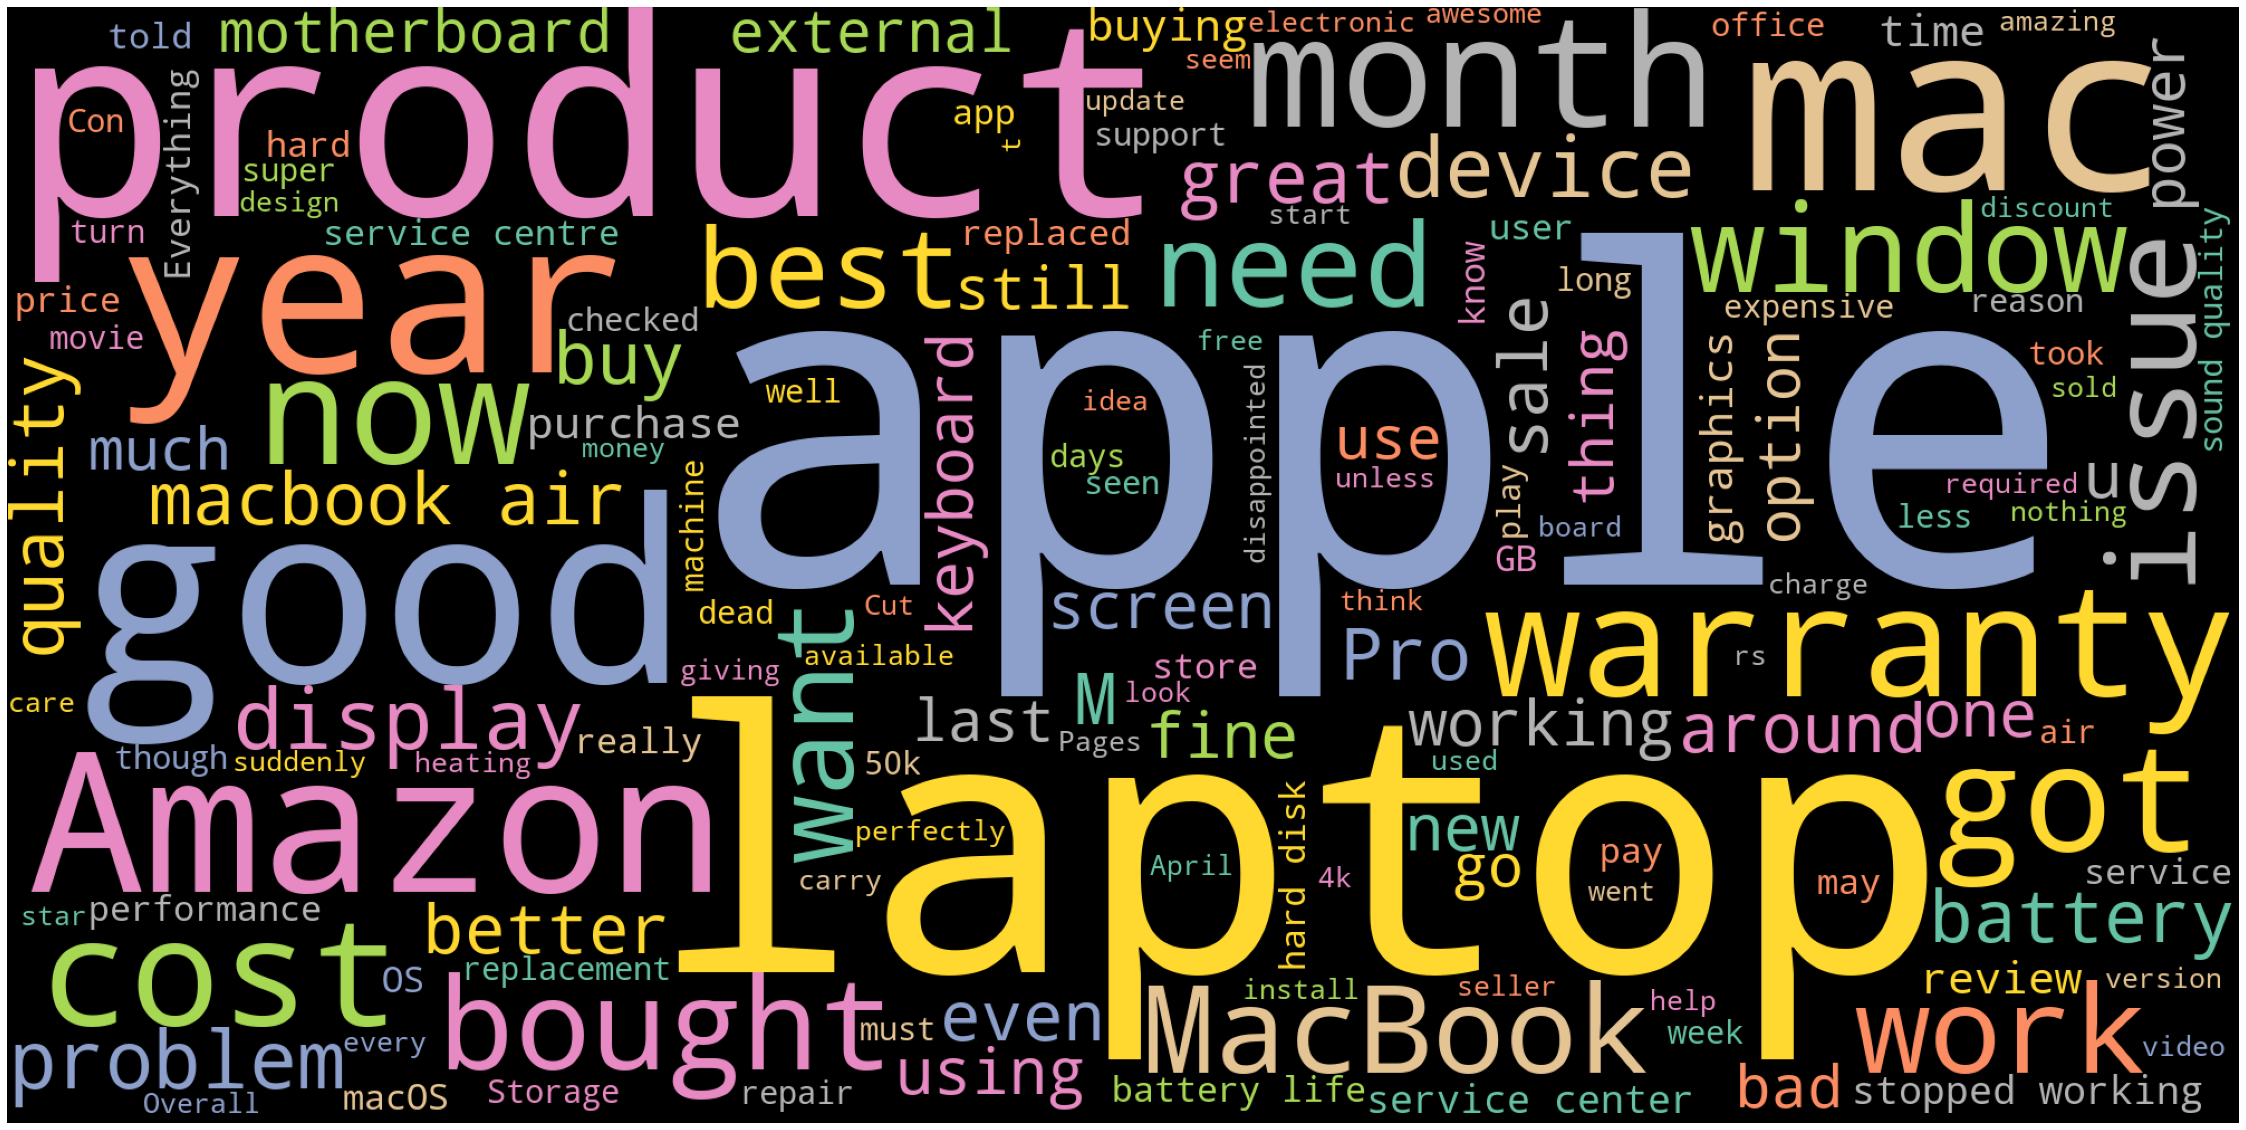

In [30]:
# Generate & plot wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud=WordCloud(width=2000,height=1000,background_color='black',max_words=150,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [31]:
# Save image
wordcloud.to_file("wordcloud.png")